In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pyart
import numpy as np
from scipy import ndimage, signal
import time

sweep  = 0
x_lims = [0, 40]
y_lims = [0, 5]
v_min  = -15
v_max  = 15
fig_sz = [20, 5]
c_lbl  = 'Velocity (m/s)'
p_data = 'velocity'
root_path = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/'
nyq       = 30

In [2]:
def plot_rhi(fn):
    # read file
    # filename = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/20141106/031202.mdv'
    radar = pyart.io.read_mdv(fn)
    display = pyart.graph.RadarDisplay(radar)
    fig = plt.figure(figsize=fig_sz)
    # plot velocity
    ax = fig.add_subplot(1,1,1)
    display.plot(p_data, sweep=sweep, vmin=v_min, vmax=v_max, fig=fig, ax=ax, colorbar_label=c_lbl)
    display.set_limits(xlim=x_lims, ylim=y_lims)

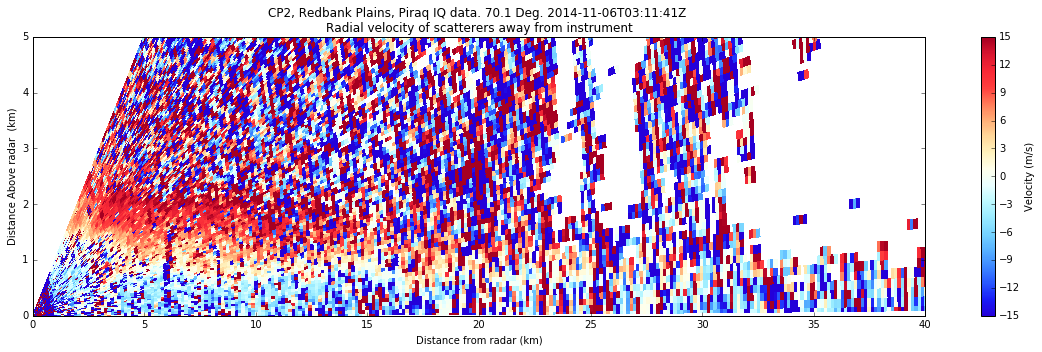

In [7]:
fn = '20141106/031202.mdv'
plot_rhi(root_path + fn)

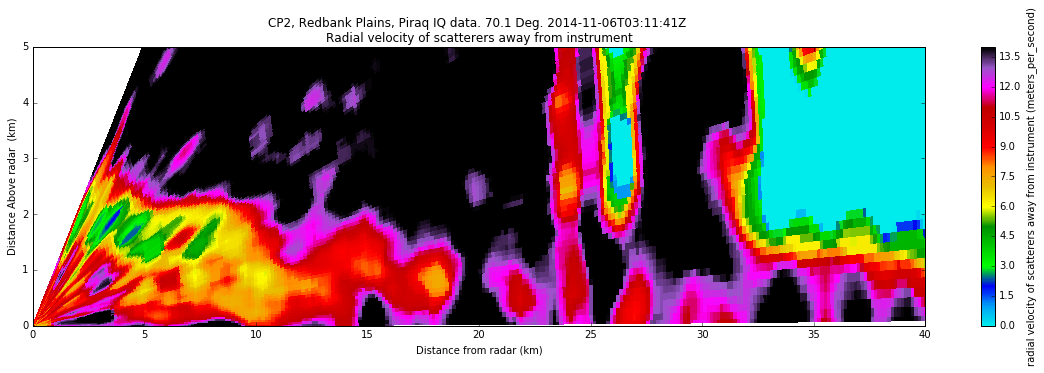

In [28]:
fn      = '20141106/031202.mdv'
radar   = pyart.io.read_mdv(root_path + fn)
display = pyart.graph.RadarDisplay(radar)

data = ndimage.filters.generic_filter(radar.fields['velocity']['data'],pyart.util.interval_std, size = (5,5),extra_arguments = (-nyq, nyq))
filtered_data = ndimage.filters.median_filter(data, size = (10,10))
#filtered_data = ndimage.filters.gaussian_filter(data, sigma = 2)

texture_field = pyart.config.get_metadata('velocity')
texture_field['data'] = filtered_data
radar.add_field('velocity_texture', texture_field, replace_existing = True)

fig = plt.figure(figsize=fig_sz)
ax = fig.add_subplot(1,1,1)
display.plot('velocity_texture', sweep=sweep, vmin=0, vmax=14, fig=fig, ax=ax, cmap = pyart.graph.cm.NWSRef)
display.set_limits(xlim=x_lims, ylim=y_lims)

7.3625


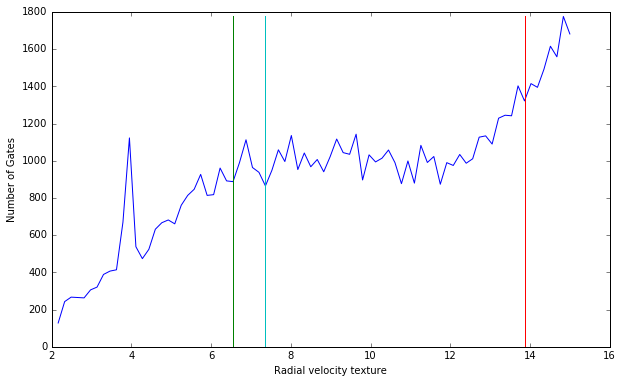

In [29]:
n, bins = np.histogram(filtered_data.flatten(), bins = 80, range = (2, 15))


peaks = signal.find_peaks_cwt(n, np.array([10]))
centers = bins[0:-1] + (bins[1] - bins[0])
search_data = n[peaks[0]:peaks[1]]
search_centers = centers[peaks[0]:peaks[1]]
locs = search_data.argsort()
location_of_minima = locs[0]

fig = plt.figure(figsize = [10,6])
plt.plot(centers, n)
zmax = n.max()
plt.xlabel('Radial velocity texture')
plt.ylabel('Number of Gates')

plt.plot([centers[peaks[0]], centers[peaks[0]]], [0, zmax])
plt.plot([centers[peaks[1]], centers[peaks[1]]], [0, zmax])
plt.plot([search_centers[location_of_minima], search_centers[location_of_minima]], [0, zmax])
noise_threshold = search_centers[locs[0]]
print(noise_threshold)

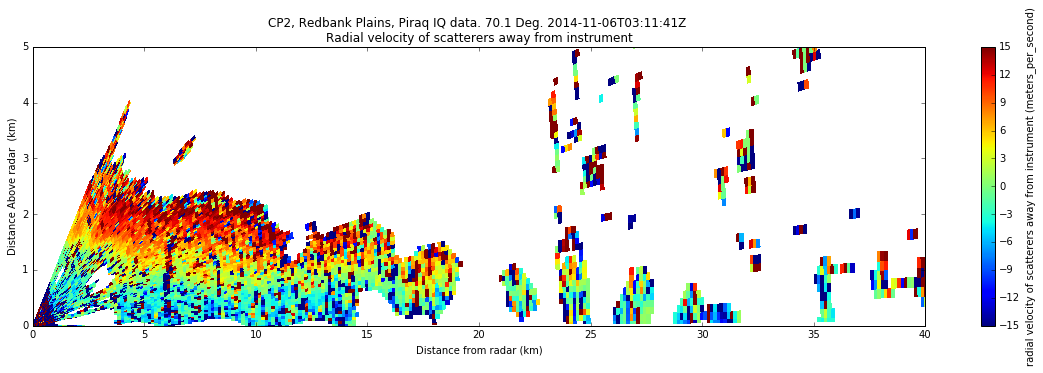

In [30]:
likely_noise = filtered_data > 12
likely_signal = np.logical_not(likely_noise)

#gatefilter = pyart.correct.GateFilter(radar)
#gatefilter.exclude_masked('reflectivity_masked')

v_masked = np.ma.masked_where(likely_noise, radar.fields['velocity']['data'])

radar.add_field_like('velocity', 
                     'velocity_masked', 
                     v_masked, replace_existing = True)

fig = plt.figure(figsize=fig_sz)
ax = fig.add_subplot(1,1,1)
display.plot('velocity_masked', sweep=sweep, vmin=-15, vmax=15, fig=fig, ax=ax)
display.set_limits(xlim=x_lims, ylim=y_lims)


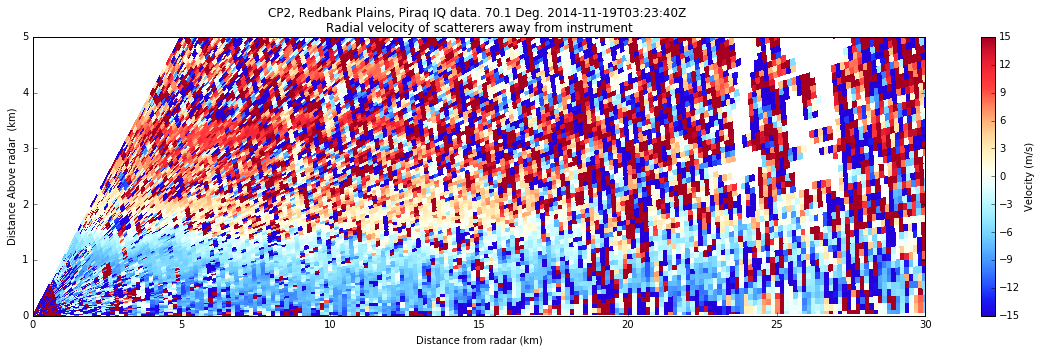

In [45]:
fn = '20141119/032402.mdv'
plot_rhi(root_path + fn)

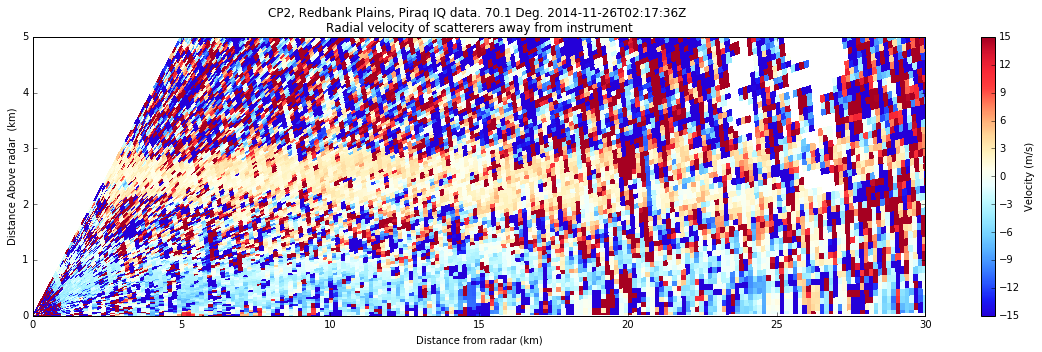

In [46]:
fn = '20141126/021802.mdv'
plot_rhi(root_path + fn)

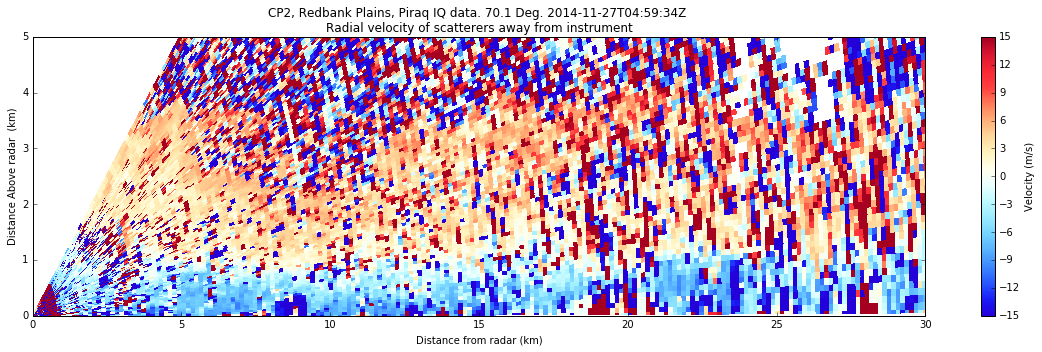

In [47]:
fn = '20141127/050001.mdv'
plot_rhi(root_path + fn)

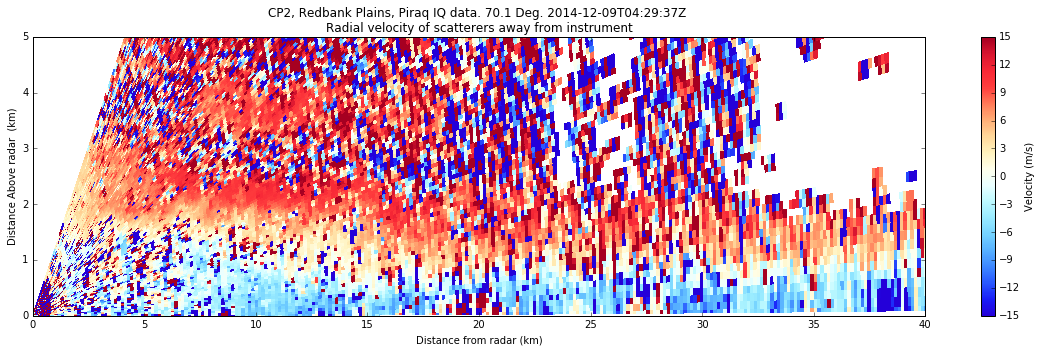

In [38]:
fn = '20141209/043002.mdv'
plot_rhi(root_path + fn)

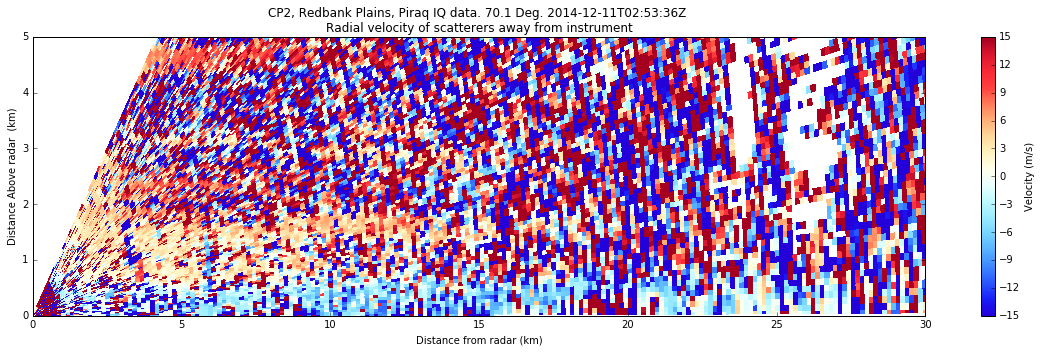

In [49]:
fn = '20141211/025402.mdv'
plot_rhi(root_path + fn)

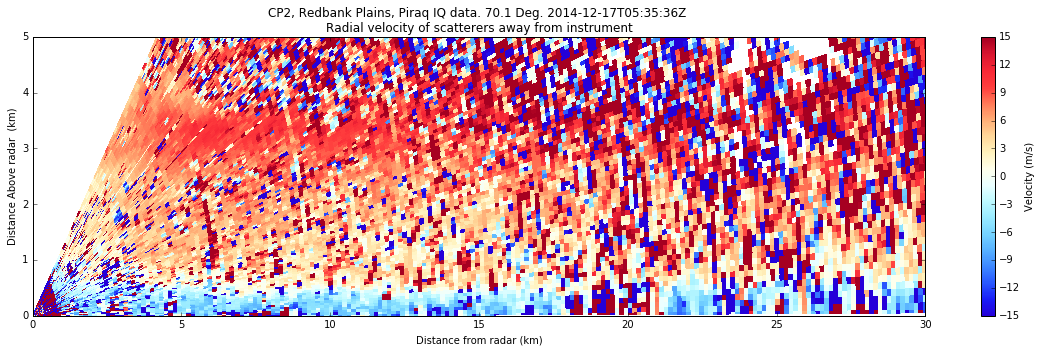

In [50]:
fn = '20141217/053602.mdv'
plot_rhi(root_path + fn)

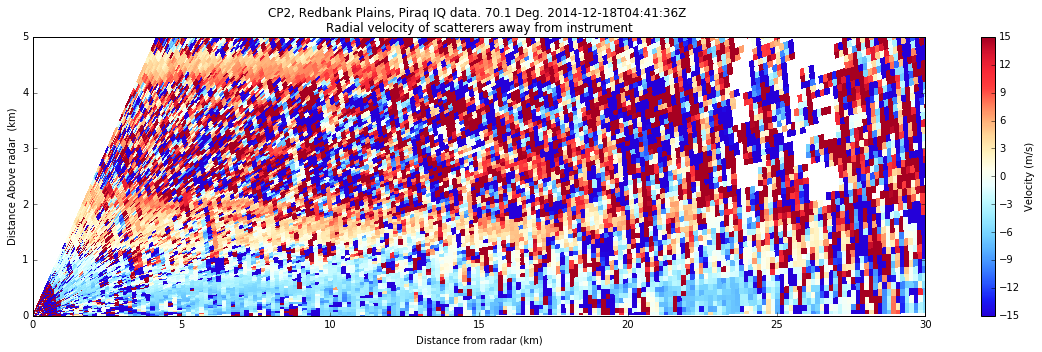

In [51]:
fn = '20141218/044202.mdv'
plot_rhi(root_path + fn)

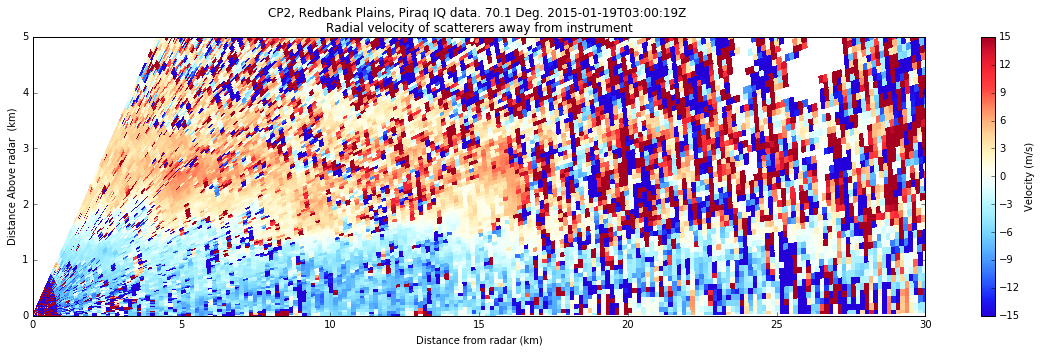

In [52]:
fn = '20150119/030045.mdv'
plot_rhi(root_path + fn)